In [1]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_Basic, RPS_Basic_Multirun  # Importing RPS_Basic class from rps_base.py
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 
from rps_simulation.dynamical_models import logistic_model, general_model
#from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)


### 1.2 Dynamical Model Bifurcations:

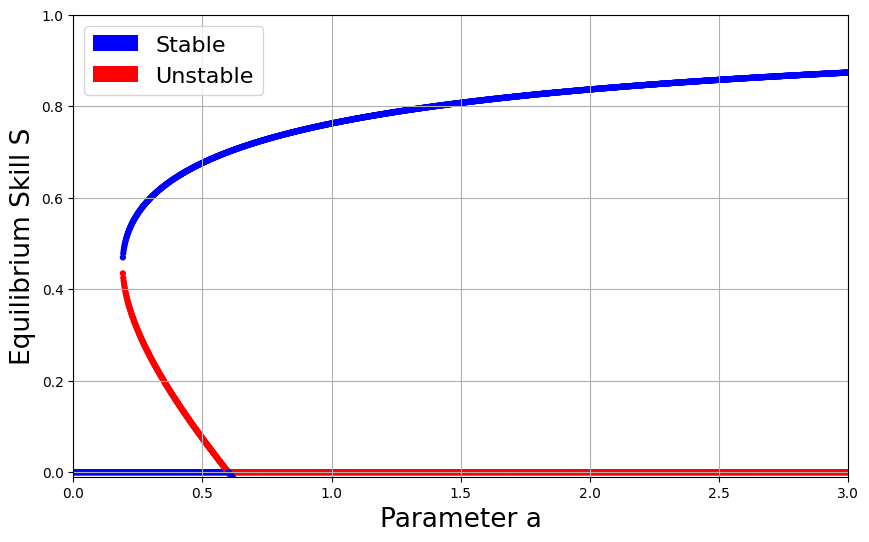

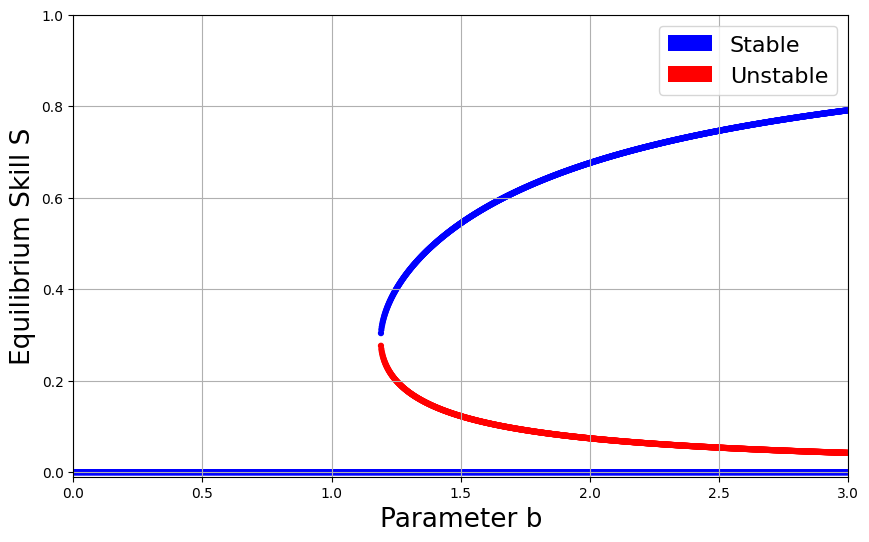

In [2]:
logistic = logistic_model(a=0.5, b=2, alpha=0.5, beta=0.3)
#fps = logistic.find_fixed_points()

# Bifurcation diagrams
logistic.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,2001), save_location='../plots/bif_a_log.png') # a (min practice)
logistic.make_bifurcation(bf_par='b', par_vals=np.linspace(0,3,2001), save_location='../plots/bif_b_log.png') # b (sensitivity to success)
#logistic.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0,2,2001)) # learning rate
#logistic.make_bifurcation(bf_par='beta', par_vals=np.linspace(0,2,2001)) # forgetting rate

## 2. Concave Learning Curve:

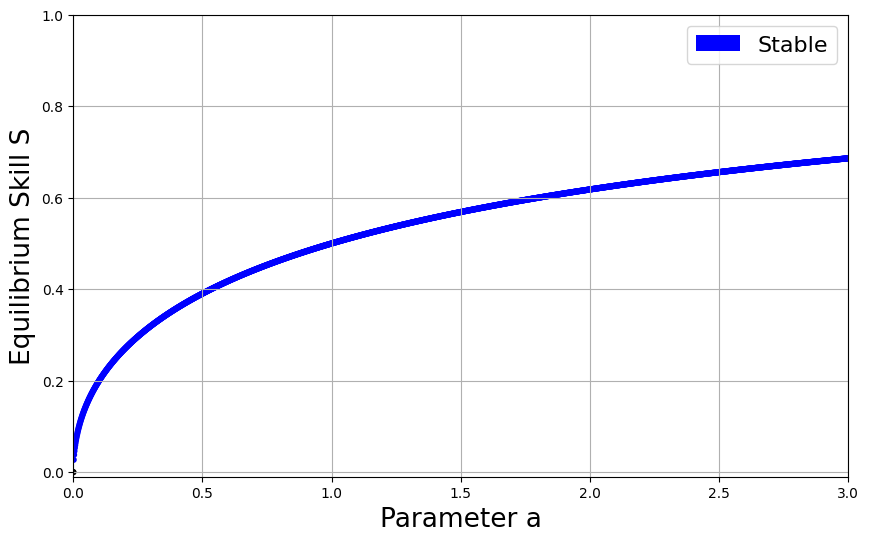

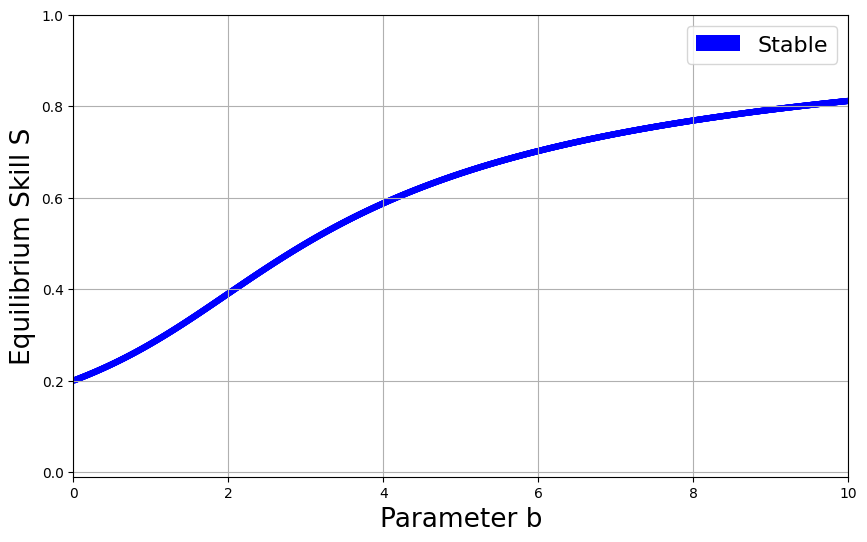

In [3]:
# define differential equn for concave exp. learning:
S,a,b,alpha,beta = sp.symbols('S,a,b,alpha,beta') # define symbols
exp_diff = -(b*alpha)*S**2 + ((b-a)*alpha - beta)*S +a*alpha

# Initialize the dynamical model:
exp_learn = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.4}, diff_eqn=exp_diff)

# Bifurcation diagrams
exp_learn.make_bifurcation(bf_par='a', par_vals=np.linspace(0,3,2001), save_location='../plots/bif_a_exp.png',
                           legend_unstable = False) # a (min practice)
exp_learn.make_bifurcation(bf_par='b', par_vals=np.linspace(0,10,2001), save_location='../plots/bif_b_exp.png',
                           legend_unstable = False) # b (sensitivity to success)
#exp_learn.make_bifurcation(bf_par='alpha', par_vals=np.linspace(0,2,2001)) # learning rate
#exp_learn.make_bifurcation(bf_par='beta', par_vals=np.linspace(0,2,2001)) # forgetting rate

## 3. Compound-Exponential Curve:
Murre's compound exponential family.

In [24]:
# define differential equn for compound-exponential learning:
S,a,b,alpha,beta,nu = sp.symbols('S,a,b,alpha,beta,nu') # define symbols
compound_exp_diff = (alpha*nu)*(alpha*S**(1-1/nu) - (a + (beta/(nu*alpha)))*S + (b*S**(2-1/nu)) - b*S**2)

print('Compound Exponential Dynamics: ')
compound_exp_diff

Compound Exponential Dynamics: 


alpha*nu*(-S**2*b - S*(a + beta/(alpha*nu)) + S**(1 - 1/nu)*alpha + S**(2 - 1/nu)*b)

In [25]:
s_vals = np.linspace(0,1, 2001)
nu_vals = [1, 2, 3, 5]

fp_list = []
for nu1 in nu_vals:
    temp_fp =[]
    for s1 in s_vals:
        temp_fp.append(compound_exp_diff.subs([(a, 0.5), (b, 2), (alpha, 0.2), (beta, 0.2), (nu, nu1), (S, s1)]))
    fp_list.append(temp_fp)


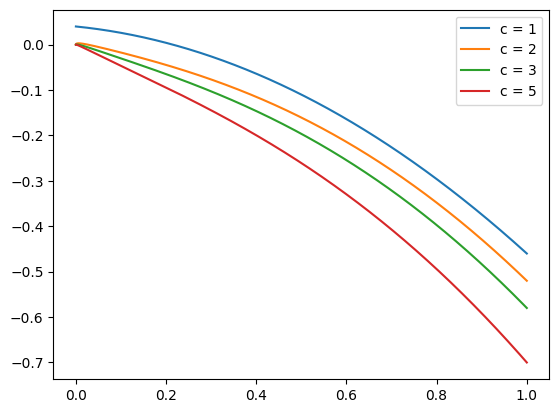

In [23]:
for i in range(len(fp_list)):
    plt.plot(s_vals, fp_list[i], label='c = ' + str(nu_vals[i]))
plt.legend()
plt.show()

In [5]:

S,a,b,alpha,beta = sp.symbols('S,a,b,alpha,beta')
con_eqn = -(b*alpha)*S**2 + ((b-a)*alpha - beta)*S +a*alpha
log_eqn = -(b*alpha)*(S**3) + (b-a)*alpha*(S**2) + (a*alpha - beta)*S

con_model = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.4}, diff_eqn=con_eqn)
log_model = general_model(params={'a':0.5, 'b':2, 'alpha':0.2, 'beta':0.3}, diff_eqn=log_eqn)

In [6]:
o1 = con_model.find_fixed_points()
o2 = log_model.find_fixed_points()

print(o1)
print(o2)

{'fixed_points': [-0.364434493427831*sqrt(2) - 0.125, -0.125 + 0.364434493427831*sqrt(2)], 'stability': [-1, 1], 'derivative': [0.291547594742265*sqrt(2), -0.291547594742265*sqrt(2)]}
{'fixed_points': [0], 'stability': [1], 'derivative': [-0.200000000000000]}


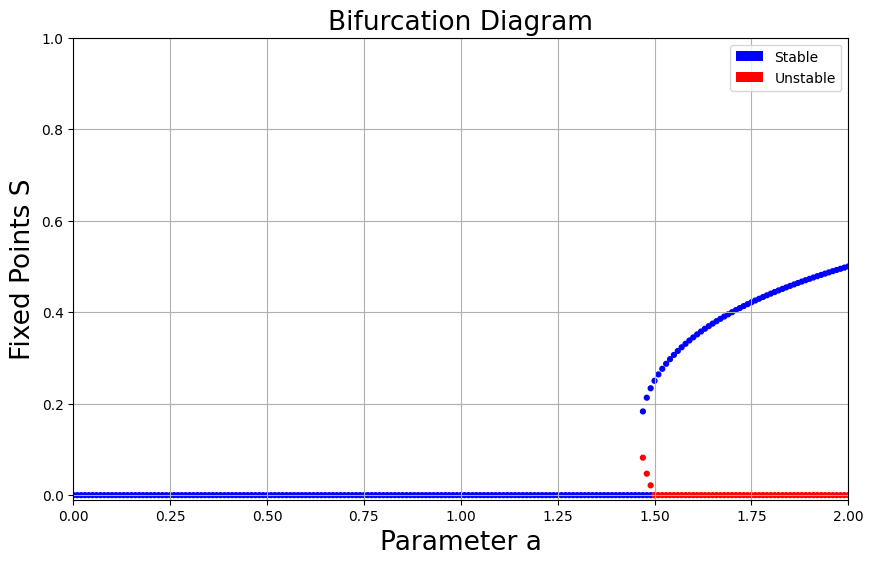

In [7]:
log_model.make_bifurcation('a', np.linspace(0,2,201))